# This is the notebook to generate data for Homo_samples
# Experiments are generated one by one with different config file. See Homo_samples for individual config files.
# The "ratio" variable is important

In [ ]:
import os
import json
import pathlib
import numpy as np
import pandas as pd
from dda import DDA
# GPU Device Config
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="3"

current_folder_path = pathlib.Path().absolute()

config = {'gpu_device': '/GPU:0',
          'dipole_length': 1,
          'min_wavelength': 0.4,
          'max_wavelength': 0.8,
          'num_wavelengths': 41,
          'ref_medium': 1.333,
          'rotation_steps': 10,
          'folder_path': None,
          'calculate_electricField': False,
          'lattice_constant': 0.41,
          'ref_data': [str(current_folder_path) + '/Au_ref_index.csv',str(current_folder_path) + '/Ag_ref_index.csv'],
          'metals': ["Au","Ag"],
          'dipole_data': str(current_folder_path)+'/Homo_samples' + '/dipole_list.csv',
          'atom_data': str(current_folder_path)+'/Homo_samples' + '/atomList_Octahedron.csv',
          "ratio":[0.8, 0.2],
          "method":"homo",
        }

# Specify the experiments you want to run

In [ ]:
config['folder_path'] = str(current_folder_path) + '/Homo_samples' +'/exp3'
with open(config['folder_path']+'/config.json','w') as outfile:
    json.dump(config,outfile)
# define the DDA object
np_dda = DDA(config)

In [ ]:
# perform the calculation
np_dda.run_DDA()
np_dda.plot_spectra()

# Plot the overall results once exp1 to exp6 are all done

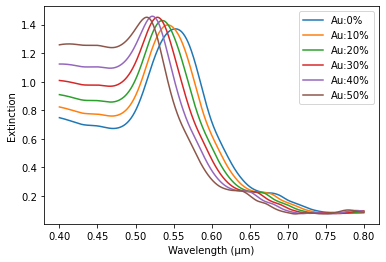

In [3]:
current_folder_path = pathlib.Path().absolute()
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
for i in range(1,7):
    data = np.loadtxt(str(current_folder_path) + '/Homo_samples' + f'/exp{i}/Results.csv',delimiter=',')
    function = interp1d(np.linspace(0.4,0.8,41),data,"cubic")
    data = function(np.linspace(0.4,0.8,1000))
    plt.plot(np.linspace(0.4,0.8,1000),data,label = f'Ag:{10*i-10}%')
    plt.xlabel("Wavelength (μm)")
    plt.ylabel("Extinction")
    plt.legend()
    plt.savefig('./Homo_samples/Au_Ag_homo.png',dpi=300)